In [17]:
import numpy as np
import matplotlib.pyplot as plt
from constants import *

In [ ]:
"""
mx_list = [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10]
Tx_list = [5,15,30,50]
Rs_list = [3,8.35,8.5,8.65,14]
beta_list = [0,0.25,0.5,1] # unit of pi
"""

In [4]:
pathToFlux = '/Users/yenhsun/SNnuBDM_data/flux/'

In [25]:
mx = 1e-3
Tx = 15
Rstar = [8.35,8.5,8.65]
beta = 0
flux_Rstar = []
for i in range(3):
    flux = np.loadtxt(pathToFlux + f'flux_mx{mx:.2e}_Tx{Tx:0{3}d}_Rs{Rstar[i]:.2f}_beta{beta:.2f}.txt',skiprows=1)
    flux_Rstar.append(flux)
flux_Rstar = np.array(flux_Rstar)

Text(0, 0.5, '$d\\Phi_\\chi/dtdT_\\chi$')

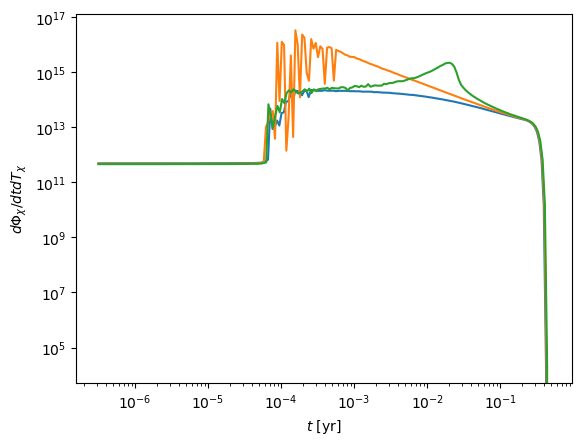

In [26]:
for i in range(3):
    plt.plot(flux_Rstar[i,:,0]/yr2s,flux_Rstar[i,:,1])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$t$ [yr]')
plt.ylabel(r'$d\Phi_\chi/dtdT_\chi$')